<a href="https://colab.research.google.com/github/financieras/ai/blob/main/regresion/medium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal

## Generación aleatoria del DataSet

In [7]:
import numpy as np

# Generando datos aleatorios
np.random.seed(42)  # Set random seed for reproducible results
n_samples = 100     # Sample size

# Generate X values with normal distribution
# Center the data points around x=5 with some spread
X = np.random.normal(loc=5, scale=2, size=n_samples)

# True parameters of the line
true_intercept = 2  # theta_0
true_slope = 1      # theta_1

# Add random noise to create y values
# This creates a normal distribution around the line
noise = np.random.normal(0, 0.5, n_samples)
Y = true_intercept + true_slope * X + noise

## Método de mínimos cuadrados
* En este método, calculamos los parámetros de la recta de regresión directamente, sin utilizar una librería específica para regresión.
* Utilizaremos las fórmulas de mínimos cuadrados ordinarios para calcular la pendiente y el intercepto.

Este código hace lo siguiente:

1. Calcula los promedios de x e y.
2. Calcula la pendiente ($θ_1$) utilizando la fórmula de mínimos cuadrados ordinarios.
3. Calcula el intercepto ($θ_0$) utilizando la fórmula de la recta $y = θ_0 +θ_1 x$.
4. Genera predicciones para todos los puntos x.
5. Calcula el coeficiente de determinación R² manualmente.
6. Imprime los resultados, incluyendo la ecuación de la recta de regresión.

Las fórmulas utilizadas son:

- Pendiente $θ_1$ = Σ((x - x̄)(y - ȳ)) / Σ((x - x̄)²)
- Intercepto $θ_0$ = ȳ - $θ_1$ * x̄
- R² = 1 - (SS_residual / SS_total)

Donde:
- x̄ y ȳ son las medias de x e y respectivamente.
- SS_residual es la suma de los cuadrados de los residuos.
- SS_total es la suma total de cuadrados.



In [8]:
# Calcular los promedios de x e y
x_mean = np.mean(X)
y_mean = np.mean(Y)

# Calcular la pendiente (β1)
numerador = np.sum((X - x_mean) * (Y - y_mean))
denominador = np.sum((X - x_mean)**2)
pendiente = numerador / denominador

# Calcular el intercepto (θ0)
intercepto = y_mean - pendiente * x_mean

# Calcular las predicciones
y_pred = pendiente * X + intercepto

# Calcular el coeficiente de determinación R²
ss_total = np.sum((Y - y_mean)**2)
ss_residual = np.sum((Y - y_pred)**2)
r_cuadrado = 1 - (ss_residual / ss_total)

# Imprimir los resultados
print("Resultados de la regresión lineal (cálculo manual):")
print(f"Pendiente (θ1): {pendiente:.4f}")
print(f"Intercepto (θ0): {intercepto:.4f}")
print(f"Ecuación de la recta: y = θ0 + θ1 x = {intercepto:.4f} + {pendiente:.4f} x")
print(f"Coeficiente de determinación (R²): {r_cuadrado:.4f}")

Resultados de la regresión lineal (cálculo manual):
Pendiente (θ1): 0.9642
Intercepto (θ0): 2.1828
Ecuación de la recta: y = θ0 + θ1 x = 2.1828 + 0.9642 x
Coeficiente de determinación (R²): 0.9322


## Algoritmo de Descenso del Gradiente

### Primero. Calculemos la función del Error.

$$Error = \frac{1}{m} \sum_{i=1}^{m} (\widehat{y}_i - y_i)^2 $$

Llamemos $J$ a al función de costes, que es el error añadiendo $\frac{1}{2}$ que será conveniente por motivos estéticos cuando derivemos y al multiplicar por 2 se simplifique.

$$J = \frac{1}{2m} \sum_{i=1}^{m} (\widehat{y}_i - y_i)^2 $$

Sustituimos el valor del $y$ real por su recta $\boxed{y=θ_0+θ_1 \cdot x}$

$$J = \frac{1}{2m} \sum_{i=1}^{m} (\widehat{y}_i - (θ_0+θ_1 \cdot x_i))^2 $$

### Segundo. Calculamos las derivadas de la función de Coste
Calculamos las derivadas parciales de la función de costes $J$ respecto a los dos parámetros $θ_0$ y $θ_1$.

$$\frac{\partial J}{\partial \theta_0} = -\frac{1}{m} \sum_{i=1}^{m} (\widehat{y}_i - y_i)$$

$$\frac{\partial J}{\partial \theta_1} = -\frac{1}{m} \sum_{i=1}^{m} (\widehat{y}_i - y_i) \cdot x_i$$

### Tercero. Introducimos el ratio de aprendizaje
Una vez que tenemos las derivadas parciales, el siguiente paso es utilizarlas para actualizar nuestros parámetros θ₀ y θ₁. Para esto, introducimos el concepto de ratio de aprendizaje, denotado como α (alpha).

El ratio de aprendizaje α es un hiperparámetro que controla el tamaño de los pasos que damos en la dirección opuesta al gradiente. Un α pequeño resultará en pasos pequeños y un aprendizaje lento pero estable, mientras que un α grande puede llevar a un aprendizaje más rápido pero potencialmente inestable.

Ahora podemos expresar las actualizaciones de los parámetros en cada iteración del algoritmo:

$$\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}$$

$$\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}$$

Sustituyendo las expresiones de las derivadas parciales que calculamos anteriormente, obtenemos:

$$\theta_0 := \theta_0 + \alpha \frac{1}{m} \sum_{i=1}^{m} (\widehat{y}_i - y_i)$$

$$\theta_1 := \theta_1 + \alpha \frac{1}{m} \sum_{i=1}^{m} (\widehat{y}_i - y_i) \cdot x_i$$

Estas son las ecuaciones fundamentales del algoritmo de descenso del gradiente para la regresión lineal. En cada iteración, actualizamos θ₀ y θ₁ simultáneamente usando estas fórmulas.

El algoritmo completo del descenso del gradiente se puede resumir de la siguiente manera:

1. Inicializar θ₀ y θ₁ con valores aleatorios o cero.
2. Repetir hasta la convergencia o un número máximo de iteraciones:
   - a. Calcular las predicciones ŷᵢ = θ₀ + θ₁ · xᵢ para todos los puntos de datos.
   - b. Actualizar θ₀ y θ₁ simultáneamente usando las ecuaciones anteriores.
3. Retornar los valores finales de θ₀ y θ₁.

Este proceso iterativo continuará hasta que los cambios en θ₀ y θ₁ sean muy pequeños (convergencia) o hasta que se alcance un número máximo predefinido de iteraciones.

In [14]:
# Añadir una columna de unos a X para el término independiente
Xb = np.column_stack((np.ones(len(X)), X))

# Inicializar parámetros
theta = np.zeros(2)
m = len(Y)
alpha = 0.01  # Tasa de aprendizaje
num_iterations = 10_000

# Función de costo
def compute_cost(X, Y, theta):
    predictions = X @ theta
    return np.sum((predictions - Y) ** 2) / (2 * m)

# Función de descenso del gradiente
def gradient_descent(X, Y, theta, alpha, num_iterations):
    costs = []
    for _ in range(num_iterations):
        predictions = X @ theta
        theta = theta - (alpha / m) * X.T.dot(predictions - Y)
        cost = compute_cost(X, Y, theta)
        costs.append(cost)
    return theta, costs

# Ejecutar descenso del gradiente
theta, costs = gradient_descent(Xb, Y, theta, alpha, num_iterations)

# Imprimir los parámetros estimados por el modelo
print(f"Pendiente (θ1): {theta[1]:.4f}")
print(f"Intercepto (θ0): {theta[0]:.4f}")

Pendiente (θ1): 0.9642
Intercepto (θ0): 2.1828


## Gráfico de la recta y la función de costo

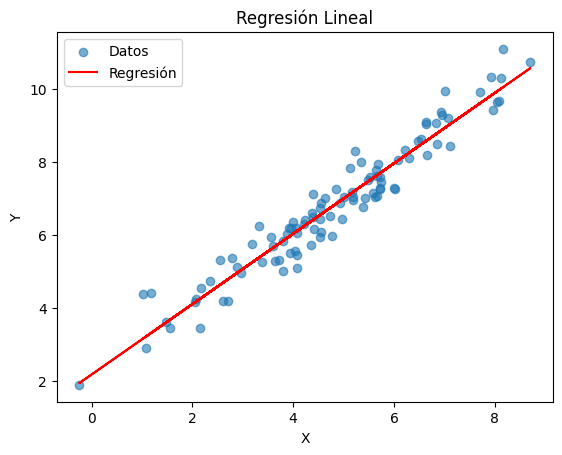

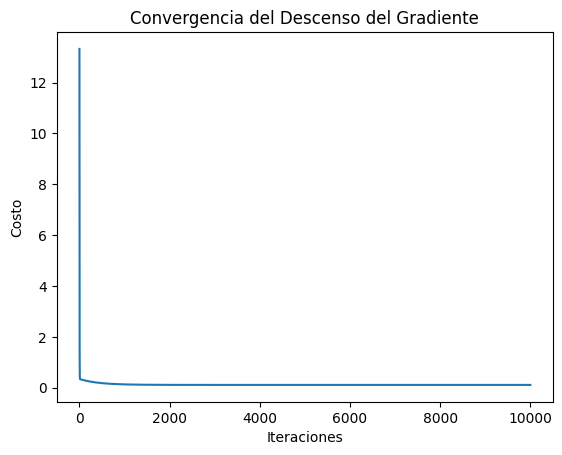

In [16]:
import matplotlib.pyplot as plt

# Graficar los datos y la línea de regresión
plt.scatter(X, Y, label='Datos', alpha=0.6)
plt.plot(X, theta[0] + theta[1] * X, color='red', label='Regresión')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Lineal')
plt.legend()
plt.show()

# Graficar la convergencia del costo
plt.plot(range(num_iterations), costs)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Convergencia del Descenso del Gradiente')
plt.show()